In [1]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

import sys
import numpy as np
import scipy as sp
import IPython
import sklearn
import pandas as pd

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats


#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

In [3]:
data_raw = pd.read_csv("titanic/train.csv")
data_val = pd.read_csv("titanic/test.csv")

In [4]:
data_raw.columns

Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object')

In [5]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
# string value cannot be dealed in ML, always turned into int
data_raw.loc[data_raw["Sex"]=="male", "Sex"] = 0
data_raw.loc[data_raw["Sex"]=="female", "Sex"] = 1

In [7]:
data_raw.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


Check correlationship between 'survive' and feature

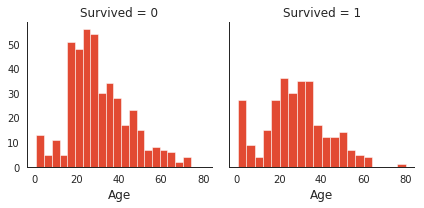

In [8]:
g = sns.FacetGrid(data_raw, col='Survived')
g.map(plt.hist, 'Age', bins=20)


In [9]:
data_raw["Embarked"].unique()


array(['S', 'C', 'Q', nan], dtype=object)

In [10]:
data_raw["Embarked"] = data_raw["Embarked"].fillna("N")
data_raw["Embarked"].unique()

array(['S', 'C', 'Q', 'N'], dtype=object)

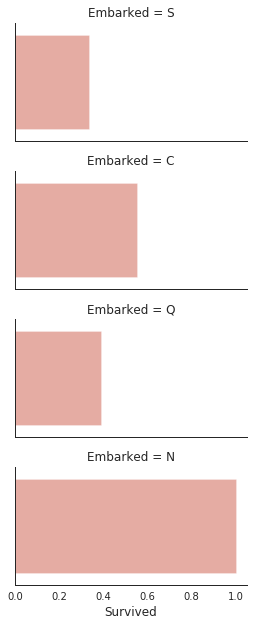

In [11]:


grid = sns.FacetGrid(data_raw, row ='Embarked', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Survived', alpha=.5, ci=None)
grid.add_legend()


In [14]:
data_raw.loc[data_raw["Embarked"]== "S", "Embarked"] = 1
data_raw.loc[data_raw["Embarked"]== "Q", "Embarked"] = 1
data_raw.loc[data_raw["Embarked"]== "C", "Embarked"] = 0
data_raw.loc[data_raw["Embarked"]== "N", "Embarked"] = 1

In [15]:
data_raw["Embarked"].describe()

count    891.000000
mean       0.811448
std        0.391372
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Embarked, dtype: float64

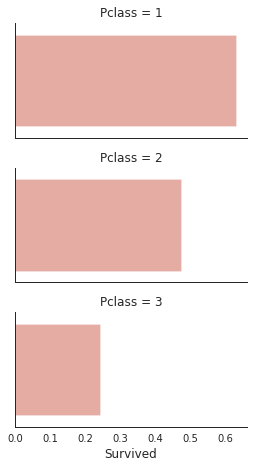

In [16]:
grid = sns.FacetGrid(data_raw, row ='Pclass', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Survived', alpha=.5, ci=None)
grid.add_legend()

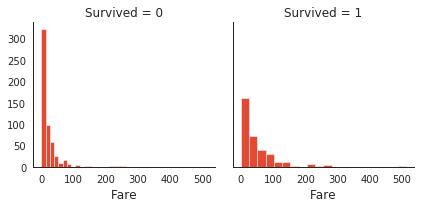

In [17]:
g = sns.FacetGrid(data_raw, col='Survived')
g.map(plt.hist, 'Fare', bins=20)


In [18]:
data_raw["Sex"].unique()

array([0, 1])

In [20]:
data_raw["Age"] = data_raw["Age"].fillna(data_raw["Age"].median())
